# Fashion MNIST - Exploration and classification

In this notebook data from the fashion MNIST is loaded and different classifiers are trained. Finally an ensemble is created.

## Load data

Load required libraries

In [10]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load data and preprocess it

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# data preprocessing
train = train_images.reshape(60000, 28*28) / 255   # reshape and scale
test = test_images.reshape(10000, 28*28) / 255
train_targets = to_categorical(train_labels)
test_targets = to_categorical(test_labels)

Train shapes:

In [3]:
train.shape, train_targets.shape

((60000, 784), (60000, 10))

Test shapes:

In [10]:
test.shape, test_targets.shape

((10000, 784), (10000, 10))

In [4]:
def plot_image(pos, image_vector):
    plt.imshow(image_vector[pos].reshape(28, 28), cmap=plt.cm.binary)
    plt.axis('off')
    plt.show()

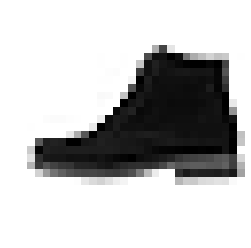

In [5]:
plot_image(42, train)

## Create a simple neural network

In [38]:
def build_network():
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

network = build_network()

In [16]:
network.fit(train, train_targets, epochs=5, batch_size=128)

W0630 15:04:40.398495 140525097101120 deprecation.py:323] From /home/diego/miniconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5614 - accuracy: 0.8032
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3817 - accuracy: 0.8598
Epoch 3/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3355 - accuracy: 0.8788
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3120 - accuracy: 0.8861
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2915 - accuracy: 0.8931


In [17]:
predictions = network.predict(test)

In [18]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, predictions.argmax(axis=1))
conf_mat

array([[800,   1,  24,   8,   0,   1, 160,   0,   6,   0],
       [  1, 977,   0,  14,   2,   0,   5,   0,   1,   0],
       [ 13,   0, 856,   4,  64,   0,  62,   0,   1,   0],
       [ 38,  10,  27, 843,  21,   0,  58,   0,   3,   0],
       [  0,   1, 166,  23, 710,   0,  99,   0,   1,   0],
       [  0,   0,   0,   0,   0, 965,   0,  21,   0,  14],
       [ 77,   1, 112,  12,  56,   0, 737,   0,   5,   0],
       [  0,   0,   0,   0,   0,  16,   0, 954,   1,  29],
       [  4,   0,   8,   5,   1,   1,   7,   4, 970,   0],
       [  0,   0,   0,   0,   0,   3,   1,  38,   0, 958]])

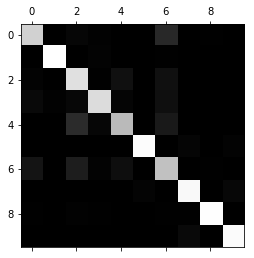

In [19]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

Visualize intra class errors:

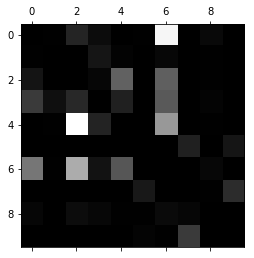

In [20]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
np.fill_diagonal(norm_conf_mat, 0)  # remove diagonal (TP)
plt.matshow(norm_conf_mat, cmap=plt.cm.gray)
# plt.xlabel(class_names,)
plt.show()

Class 0 is being missclassified the most, especially with respect to class 6.

In [21]:
class_names[0], class_names[6]

('T-shirt/top', 'Shirt')

In [23]:
report_simple_nn = classification_report(test_labels, predictions.argmax(axis=1), target_names=class_names, digits=3)
print(report_simple_nn)

              precision    recall  f1-score   support

 T-shirt/top      0.857     0.800     0.828      1000
     Trouser      0.987     0.977     0.982      1000
    Pullover      0.718     0.856     0.781      1000
       Dress      0.927     0.843     0.883      1000
        Coat      0.831     0.710     0.766      1000
      Sandal      0.979     0.965     0.972      1000
       Shirt      0.653     0.737     0.692      1000
     Sneaker      0.938     0.954     0.946      1000
         Bag      0.982     0.970     0.976      1000
  Ankle boot      0.957     0.958     0.958      1000

   micro avg      0.877     0.877     0.877     10000
   macro avg      0.883     0.877     0.878     10000
weighted avg      0.883     0.877     0.878     10000



### Use simple-validation to find the best number of epochs

Create a validation set (a fraction of the train set):

In [41]:
x_train, val_train, x_target, val_target = train_test_split(train, train_targets, test_size=0.25, random_state=42)

In [42]:
train_val_results = network.fit(x_train, x_target, epochs=20, batch_size=128, validation_data=(val_train, val_target))

W0701 11:08:52.501058 140466262558528 deprecation.py:323] From /home/diego/miniconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 1s 32us/sample - loss: 0.5956 - accuracy: 0.7912 - val_loss: 0.5116 - val_accuracy: 0.8063
Epoch 2/20
45000/45000 [==============================] - 1s 25us/sample - loss: 0.4022 - accuracy: 0.8523 - val_loss: 0.4552 - val_accuracy: 0.8474
Epoch 3/20
45000/45000 [==============================] - 1s 27us/sample - loss: 0.3553 - accuracy: 0.8686 - val_loss: 0.3738 - val_accuracy: 0.8631
Epoch 4/20
45000/45000 [==============================] - 1s 24us/sample - loss: 0.3224 - accuracy: 0.8813 - val_loss: 0.3403 - val_accuracy: 0.8775
Epoch 5/20
45000/45000 [==============================] - 1s 28us/sample - loss: 0.3032 - accuracy: 0.8866 - val_loss: 0.3338 - val_accuracy: 0.8824
Epoch 6/20
45000/45000 [==============================] - 1s 27us/sample - loss: 0.2859 - accuracy: 0.8943 - val_loss: 0.3259 - val_accuracy: 0.8817
Epoch 7/20
45000/45000 [==============================] 

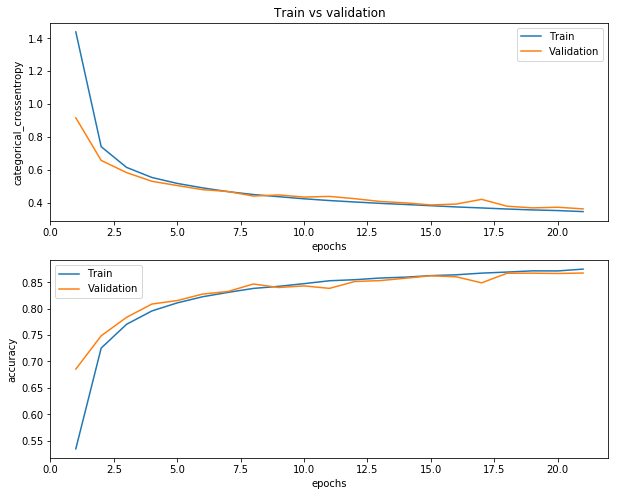

In [134]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    epochs = len(history['loss']) + 1
    p1 = sns.lineplot(x=range(1, epochs), y=history['loss'], label='Train', ax=ax1)
    p1 = sns.lineplot(x=range(1, epochs), y=history['val_loss'], label='Validation', ax=ax1)
    p2 = sns.lineplot(x=range(1, epochs), y=history['accuracy'], label='Train', ax=ax2)
    p2 = sns.lineplot(x=range(1, epochs), y=history['val_accuracy'], label='Validation', ax=ax2)
    p1.set(xlabel='epochs', ylabel='categorical_crossentropy', title='Train vs validation')
    p2.set(xlabel='epochs', ylabel='accuracy')
    fig

plot_history(train_val_results.history)

## Using convolutional layers

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)) / 255
test_images = test_images.reshape((10000, 28, 28, 1)) / 255

In [17]:
def build_network():
    network = models.Sequential()
    # Convolutional layers
    network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    network.add(layers.MaxPooling2D((2, 2)))
    network.add(layers.Dropout(0.3))
    network.add(layers.Conv2D(64, (3, 3), activation='relu'))
    network.add(layers.MaxPooling2D((2, 2)))
    network.add(layers.Dropout(0.3))
    network.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # Adding layer on toabsp
    network.add(layers.Flatten())
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dropout(0.3))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

network = build_network()

In [15]:
x_train, val_train, x_target, val_target = train_test_split(train_images, train_targets, test_size=0.25, random_state=42)
x_train.shape, val_train.shape, x_target.shape, val_target.shape

((45000, 28, 28, 1), (15000, 28, 28, 1), (45000, 10), (15000, 10))

In [18]:
train_val_results = network.fit(x_train, x_target, epochs=20, validation_data=(val_train, val_target), 
                                use_multiprocessing=True, workers=5)

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
45000/45000 [==============================] - 14s 316us/sample - loss: 0.6730 - accuracy: 0.7517 - val_loss: 0.4130 - val_accuracy: 0.8489
Epoch 2/20
45000/45000 [==============================] - 14s 304us/sample - loss: 0.4347 - accuracy: 0.8435 - val_loss: 0.3926 - val_accuracy: 0.8475
Epoch 3/20
45000/45000 [==============================] - 17s 374us/sample - loss: 0.3842 - accuracy: 0.8630 - val_loss: 0.3448 - val_accuracy: 0.8695
Epoch 4/20
45000/45000 [==============================] - 14s 311us/sample - loss: 0.3619 - accuracy: 0.8712 - val_loss: 0.3063 - val_accuracy: 0.8859
Epoch 5/20
45000/45000 [==============================] - 17s 388us/sample - loss: 0.3502 - accuracy: 0.8768 - val_loss: 0.3090 - val_accuracy: 0.8897
Epoch 6/20
45000/45000 [==============================] - 14s 301us/sample - loss: 0.3500 - accuracy: 0.8776 - val_loss: 0.2968 - val_accuracy: 0.8937
Epoch 7/20
45000/45000 [====================

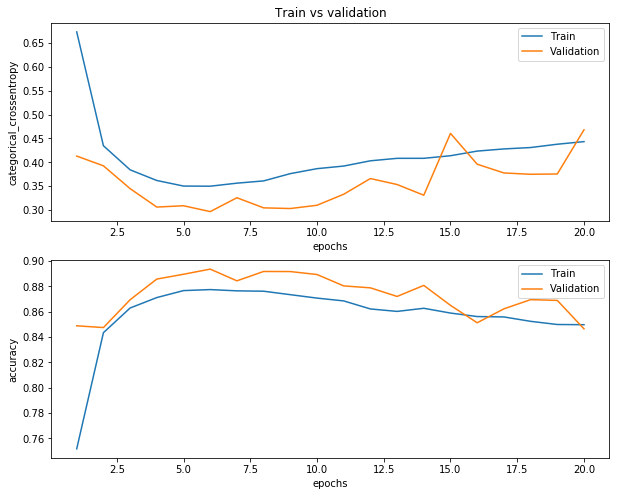

In [21]:
plot_history(train_val_results.history)

Fit again using all the train set, and 5 epochs

In [24]:
network = build_network()
network.fit(train_images, train_targets, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 291us/sample - loss: 0.6145 - accuracy: 0.7747
Epoch 2/5
60000/60000 [==============================] - 17s 289us/sample - loss: 0.4001 - accuracy: 0.8565
Epoch 3/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.3655 - accuracy: 0.8705
Epoch 4/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.3604 - accuracy: 0.8761
Epoch 5/5
60000/60000 [==============================] - 17s 291us/sample - loss: 0.3691 - accuracy: 0.8740


In [25]:
predictions = network.predict(test_images)

In [26]:
report_cross_validated_conv_nn = classification_report(test_labels, predictions.argmax(axis=1), 
                                                       target_names=class_names, digits=3)
print(report_cross_validated_conv_nn)

              precision    recall  f1-score   support

 T-shirt/top      0.823     0.836     0.829      1000
     Trouser      0.989     0.973     0.981      1000
    Pullover      0.789     0.880     0.832      1000
       Dress      0.790     0.953     0.864      1000
        Coat      0.867     0.722     0.788      1000
      Sandal      0.991     0.957     0.974      1000
       Shirt      0.727     0.611     0.664      1000
     Sneaker      0.937     0.972     0.954      1000
         Bag      0.971     0.978     0.975      1000
  Ankle boot      0.965     0.959     0.962      1000

   micro avg      0.884     0.884     0.884     10000
   macro avg      0.885     0.884     0.882     10000
weighted avg      0.885     0.884     0.882     10000



## Train a RandomForest regressor

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [68]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'bootstrap': [False],
    'max_depth': [None] + [x for x in range(1, 10, 1)],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': range(10, 500, 50)
}

rf_grid_search = RandomizedSearchCV(rf_clf, param_distributions=param_grid, cv=3, 
                                    scoring='f1_weighted', n_iter = 30, 
                                    verbose=1, random_state=42, n_jobs=-1)
rf_grid_search.fit(train, train_targets)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 37.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=30, n_jobs=-1,
          param_distributions={'bootstrap': [False], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': range(10, 500, 50)},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='f1_weighted', verbose=1)

In [70]:
rf_grid_search.best_params_

{'n_estimators': 460,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [7]:
best_params = {
    'n_estimators': 460,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': None,
    'bootstrap': False,
    'n_jobs': -1
}
rf_clf = RandomForestClassifier(**best_params)

In [8]:
rf_clf.fit(train, train_labels)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=460, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
predictions = rf_clf.predict(test)

In [17]:
from sklearn.metrics import classification_report

report_rf = classification_report(test_labels, predictions.argmax(axis=1), 
                                  target_names=class_names, digits=3)
print(report_rf)

              precision    recall  f1-score   support

 T-shirt/top      0.456     0.954     0.617      1000
     Trouser      0.999     0.948     0.973      1000
    Pullover      0.865     0.701     0.775      1000
       Dress      0.929     0.845     0.885      1000
        Coat      0.853     0.715     0.778      1000
      Sandal      0.993     0.943     0.967      1000
       Shirt      0.868     0.446     0.589      1000
     Sneaker      0.942     0.945     0.944      1000
         Bag      0.989     0.953     0.970      1000
  Ankle boot      0.965     0.934     0.949      1000

   micro avg      0.838     0.838     0.838     10000
   macro avg      0.886     0.838     0.845     10000
weighted avg      0.886     0.838     0.845     10000



## Train a XGBoost classifier

In [29]:
from xgboost import XGBClassifier

xgb_params = {
    'learning_rate':0.01,
    'n_estimators':500,
    'max_depth':4,
    'min_child_weight':0,
    'gamma':0.6,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'objective':'multi:softmax',
    'scale_pos_weight':1,
    'reg_alpha':0.00006,
    'random_state':42,
    'nthread':-1
}

xgb_clf = XGBClassifier(**xgb_params)
xgb_clf.fit(train, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.6,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=0, missing=None, n_estimators=500, n_jobs=1,
       nthread=-1, objective='multi:softprob', random_state=42,
       reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)

In [30]:
predictions = xgb_clf.predict(test)

In [31]:
xgb_report = classification_report(test_labels, predictions, target_names=class_names, digits=3)
print(xgb_report)

              precision    recall  f1-score   support

 T-shirt/top      0.800     0.832     0.816      1000
     Trouser      0.991     0.951     0.970      1000
    Pullover      0.727     0.760     0.743      1000
       Dress      0.844     0.885     0.864      1000
        Coat      0.721     0.779     0.749      1000
      Sandal      0.979     0.930     0.954      1000
       Shirt      0.674     0.550     0.606      1000
     Sneaker      0.910     0.930     0.920      1000
         Bag      0.949     0.955     0.952      1000
  Ankle boot      0.919     0.947     0.933      1000

   micro avg      0.852     0.852     0.852     10000
   macro avg      0.851     0.852     0.851     10000
weighted avg      0.851     0.852     0.851     10000

